# Support Vector Machine Classification

- Support Vector Machine attempts to classify various datapoints through the discovery of a hyperplane that maximizes the margin denoted as p between the various groups present in the data. The margin is calculated as the distance between the support vectors and the decision boundary. If linear  separability is not possible in the original data, the features can be mapped to a higher dimensional representation in an attempt to discover a clear decision boundary.

### Import Required Packages

In [12]:
import numpy as np
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Load in the Data

In [2]:
iris = pd.read_csv('iris_sklearn_data.csv') # data was obtianed via sklearn

# Visualize the dataframe
iris.head()

,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Seperate the Features from the Labels
X = iris[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']]
y = iris['Species']

### Cross Validation Via Gridsearch

In [5]:
# Specify the cross validation splits and scoring metric to determine the best model parameters
inner_cv = KFold(n_splits = 4, shuffle = True, random_state = 0)
outer_cv = KFold(n_splits = 4, shuffle = True, random_state = 0)
scoring = 'accuracy'

In [6]:
# Inialize the SVM model
svm = SVC()

# Specify the parameters you would like the gridsearch to attempt
parameters = {'C': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Specify the SVM with the range of parameters to discover the best model
svm_clf = GridSearchCV(estimator = svm, param_grid = parameters, scoring = scoring, cv = inner_cv)

# Score the best model accross all four splits created by the outer cross validation layer
nested_scores = cross_val_score(estimator = svm_clf, X = X, y = y, cv = outer_cv)

# Display all of the scores obtained
print('Four Nested Scores (Accuracy)')
print(nested_scores)

# Calculate the average score across all of the validation splits
avg_score = nested_scores.mean()
print('Average Accuracy: {}' .format(avg_score))

Four Nested Scores (Accuracy)
[0.97368421 0.94736842 1.         0.97297297]
Average Accuracy: 0.9735064011379801


### Evaluate the Best Model

In [9]:
# Display the best parameters discovered
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

svm_clf.fit(X_train, y_train)
svm_clf.best_params_

{'C': 0.1, 'kernel': 'poly'}

1.0
1.0


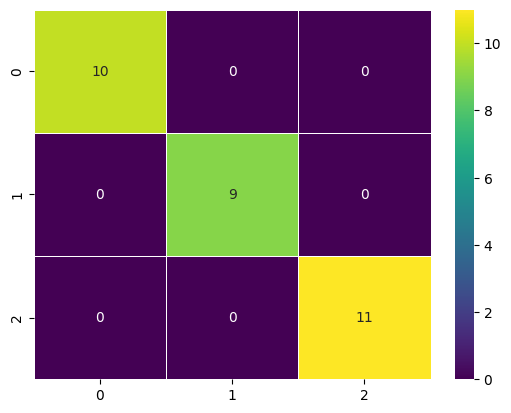

In [13]:
# Initialize The Discovered Model
svm_best = SVC(C = 0.1, kernel = 'poly')

# Fit the model
svm_best_fit = svm_best.fit(X_train, y_train)

# Make predictions based on X_test
y_predict = svm_best_fit.predict(X_test)

# Test model performance via various Metrics
confusion_mtx = confusion_matrix(y_test, y_predict)
sns.heatmap(confusion_mtx, linewidth=0.4, annot=True, cmap='viridis')

precision = precision_score(y_test, y_predict, average = 'macro')
print(precision)

recall = recall_score(y_test, y_predict, average = 'macro')
print(recall)